# Exploratory data analysis (EDA) of the Absenteeism at work Data Set

In [193]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [194]:
data = pd.read_csv('data/Absenteeism_at_work.csv', sep=";")

In [195]:
data['Social drinker'] = data['Social drinker'].astype('bool')
data['Social smoker'] = data['Social smoker'].astype('bool')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('bool')
data['Seasons'] = data['Seasons'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Reason for absence'] = data['Reason for absence'].astype('category')

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    bool    
 12  Educatio

In [197]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)

In [198]:
# all columns
all_col = list(train_df.columns)

In [199]:
# numeric columns including target
num1 = train_df.loc[:,'Transportation expense':'Hit target']
num2 = train_df['Son']
num3 = train_df.loc[:, 'Pet':'Absenteeism time in hours']
num = pd.concat((num1, num2, num3), axis=1)
num_col = list(num.columns)

In [200]:
# categorical columns
cat = train_df.loc[:, "Reason for absence":"Seasons"]
cat_col = list(cat.columns)

In [201]:
# binary columns
binary = train_df[["Disciplinary failure", "Social drinker", "Social smoker"]]
binary_col = list(binary.columns)

In [202]:
# ordinal column
ordinal= train_df[["Education"]]
ordinal_col = list(ordinal.columns)

# Summary of the data set (YIKI)

## Value Count Table

In [203]:
count_table = {}
for column in all_col:
    count_table[column] = train_df[column].nunique()

pd.DataFrame(count_table, index=["Unique Value Count"]).T

,Unique Value Count
ID,35
Reason for absence,28
Month of absence,13
Day of the week,5
Seasons,4
Transportation expense,24
Distance from Residence to Work,25
Service time,17
Age,22
Work load Average/day,38


# Overall exploratory data analysis


## Correlation Matrix (GUANSHU)

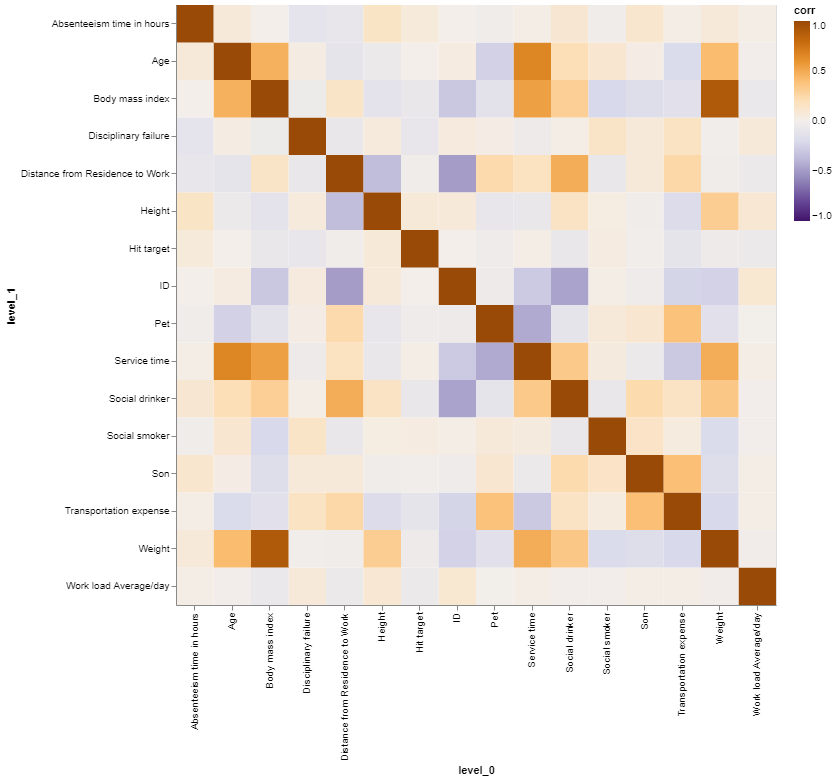

In [204]:
corr_df = train_df.corr().stack().reset_index(name='corr')
alt.Chart(corr_df).mark_rect().encode(
    x='level_0',
    y='level_1',
    tooltip='corr',
    color=alt.Color('corr', scale=alt.Scale(domain=(-1, 1), scheme='purpleorange'))
).properties(width=600, height=600)

## Frequency Distributions for all columns (RACHEL) 

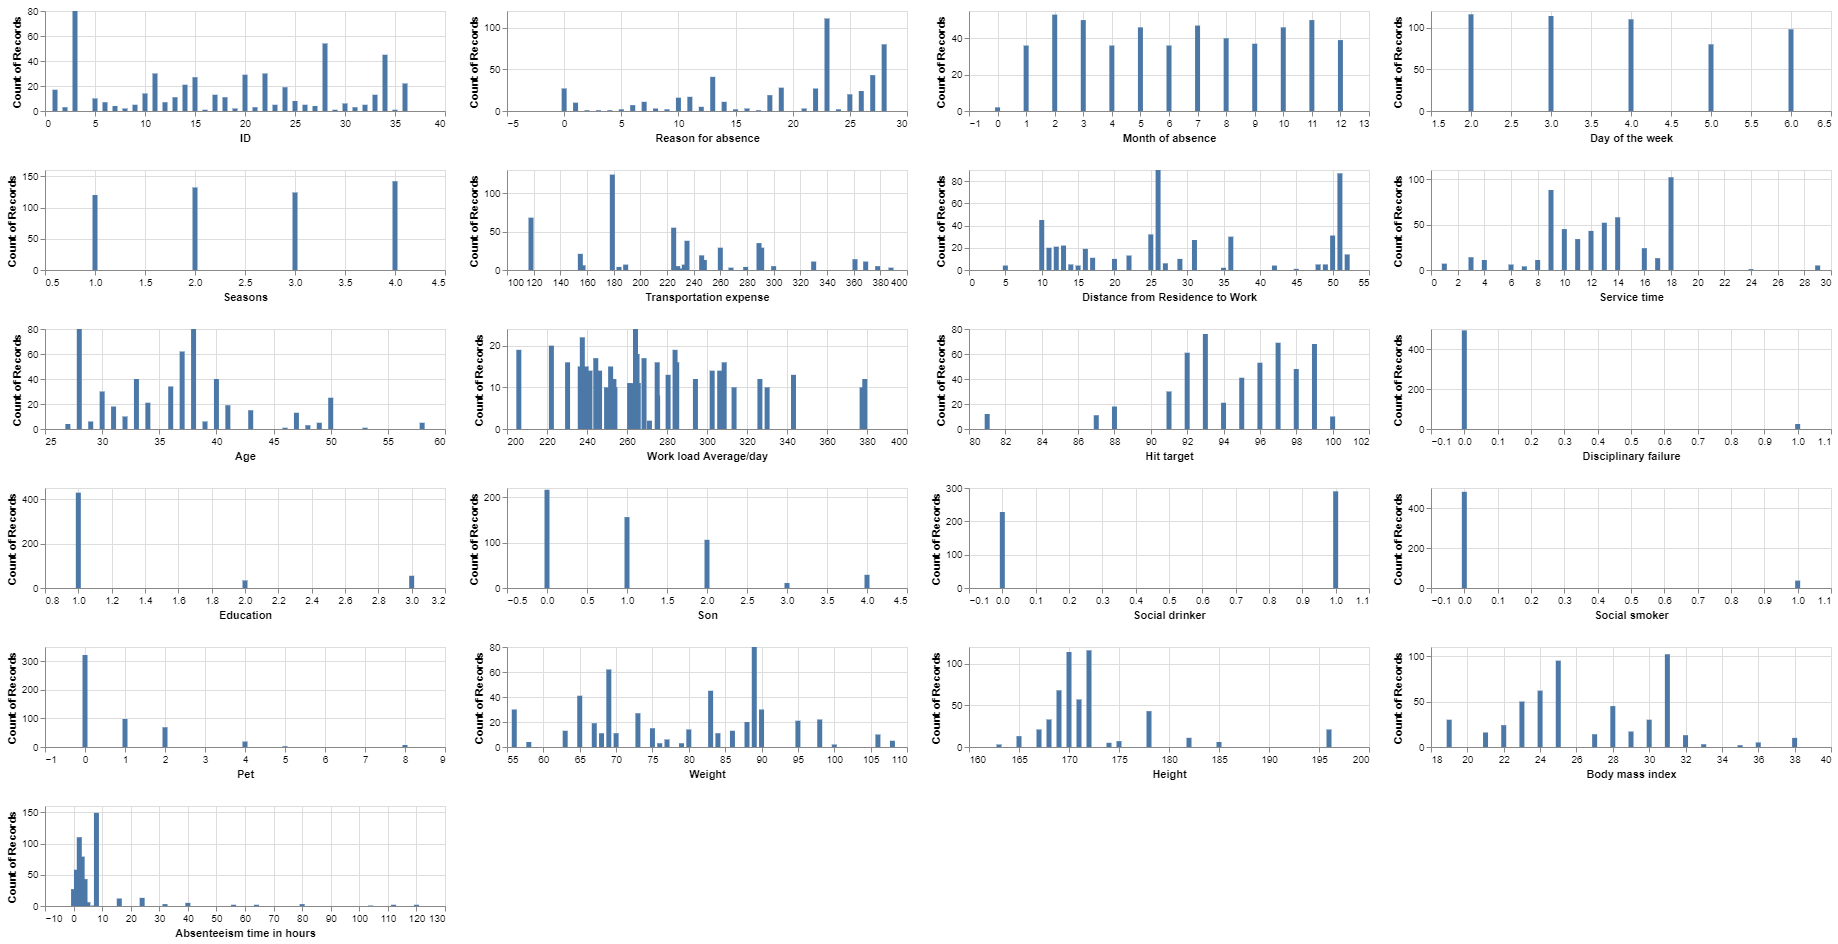

In [205]:
# Historgrams for all columns
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat("repeat"), type='quantitative'),
    alt.Y('count()')
).properties(height=100, width=400
).repeat(repeat=all_col, columns=4)

## Reasons of Absence Table (YIKI)

In [206]:
reason_count = train_df.groupby("Reason for absence")[['Absenteeism time in hours']].count().reset_index()
reason_count['Frequency'] = (reason_count['Absenteeism time in hours']/(reason_count.sum()[['Absenteeism time in hours']][0]))
reason_count = reason_count.sort_values(by=['Frequency'], ascending=False,)

In [207]:
pd.set_option("display.max_colwidth", None)

reason_list = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
reason_count['Reason for absence'] = reason_count['Reason for absence'].map(reason_list)
reason_count = reason_count.sort_values(by=['Frequency'], ascending=False)
reason_count.rename(columns = {'Absenteeism time in hours': 'Number of occurrences'}, inplace = True)
reason_count

,Reason for absence,Number of occurrences,Frequency
22,Medical consultation,111,0.214286
27,Dental consultation,80,0.154440
26,Physiotherapy,43,0.083012
13,Diseases of the musculoskeletal system and connective tissue,41,0.079151
19,"Injury, poisoning and certain other consequences of external causes",28,0.054054
21,Patient follow-up,27,0.052124
0,Unknown,27,0.052124
25,Unjustified absence,24,0.046332
24,Laboratory examination,20,0.038610
18,"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",19,0.036680


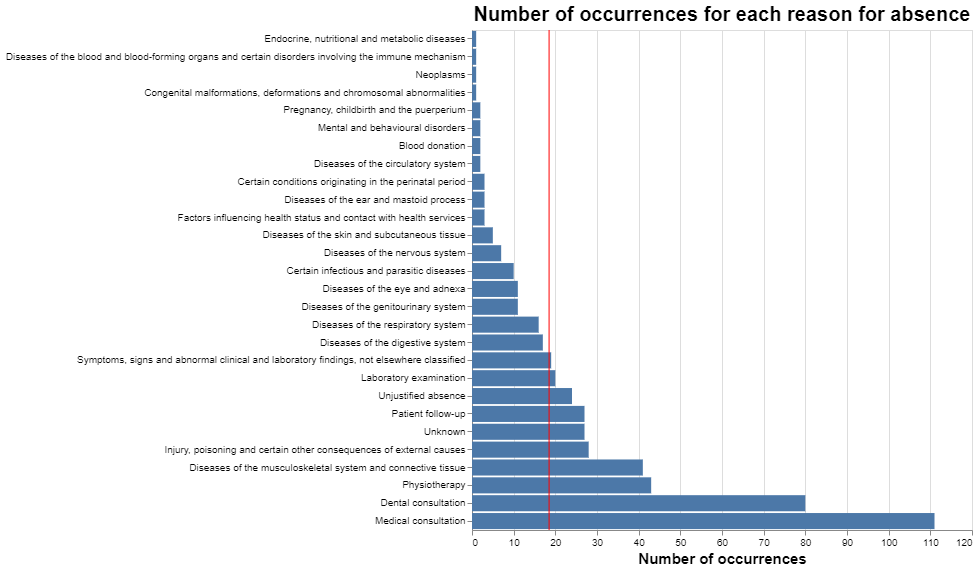

In [218]:
bar_graph = alt.Chart(reason_count,
          title = "Number of occurrences for each reason for absence").mark_bar(
).encode(
    x=alt.X('Number of occurrences'),
    y=alt.Y('Reason for absence', sort='x', title = None)
)
line = alt.Chart(reason_count).mark_rule(color='red').encode(
    x=alt.X('mean(Number of occurrences):Q', title = 'Number of occurrences')
)
(bar_graph + line).properties(
    width=500, height = 500).configure_title(
    fontSize=20).configure_axis(
    labelFontSize=10, titleFontSize = 15, labelLimit=500)

# Numeric data analysis (RACHEL) 


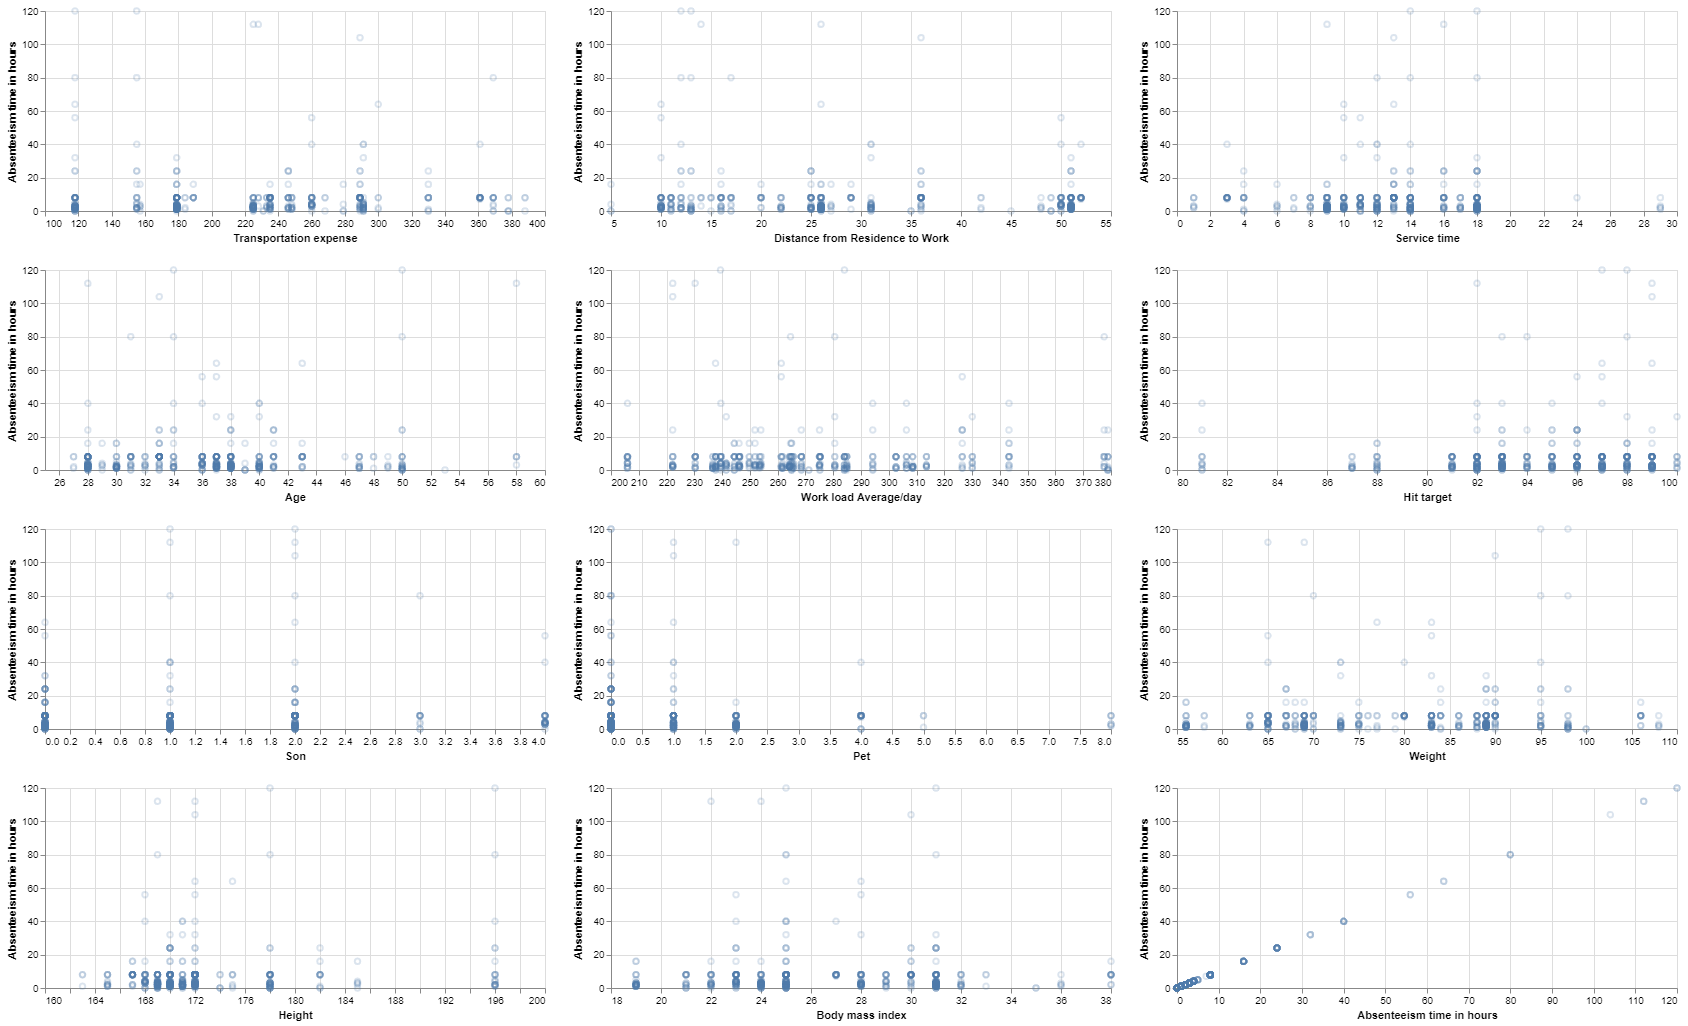

In [209]:
# scatterplots for each numeric column  vs. target
alt.Chart(num).mark_point(opacity=0.2).encode(
    alt.X(alt.repeat("repeat"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y('Absenteeism time in hours', scale=alt.Scale(zero=False))
).properties(width=500,
             height=200
).repeat(repeat=num_col, columns=3)

> Add comments (Santiago)

# Categorical data analysis (RACHEL) 


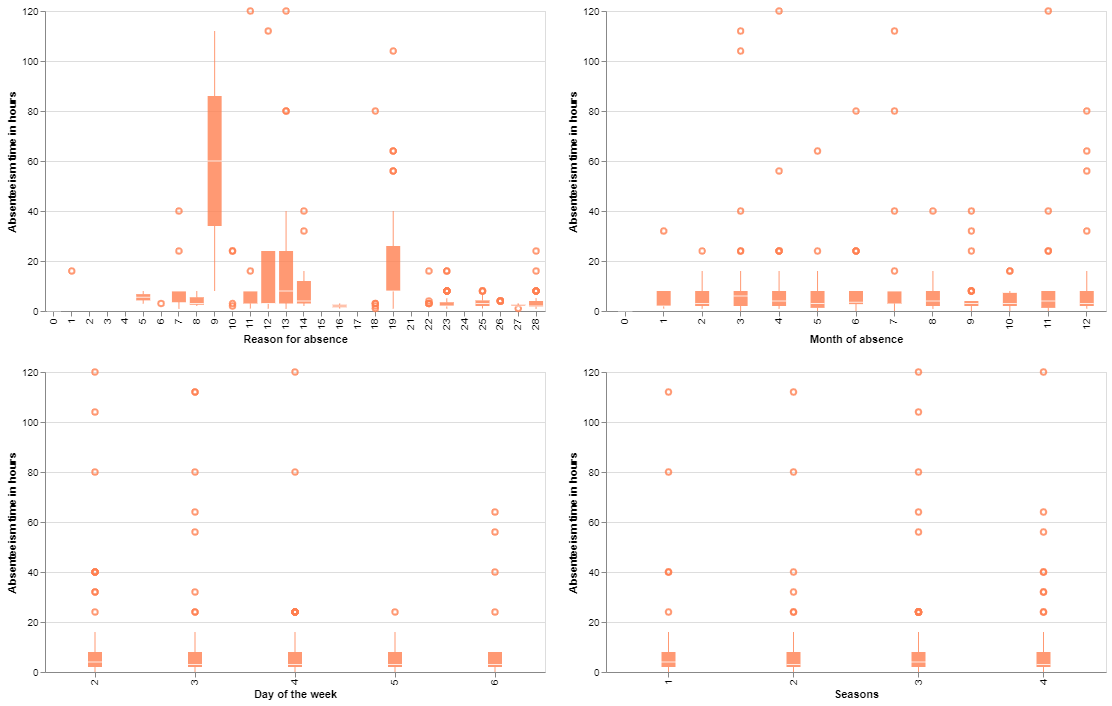

In [210]:
# boxplots for all categorical features vs. target
alt.Chart(train_df).mark_boxplot(color='coral', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=500, height=300
).repeat(repeat=cat_col, columns=2)

> Add comments (Santiago)

# Binary data analysis (RACHEL) 


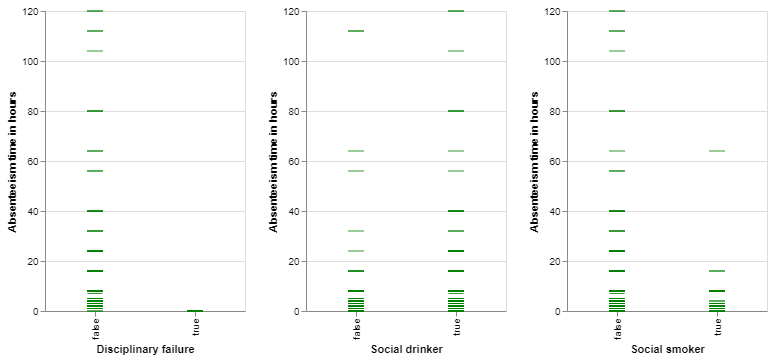

In [211]:
# boxplots for all binary features vs. target
alt.Chart(train_df).mark_tick(color='green', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=200, height=300
).repeat(repeat=binary_col, columns=3)

> Add comments (Santiago)

# Oridnal data analysis (RACHEL) 


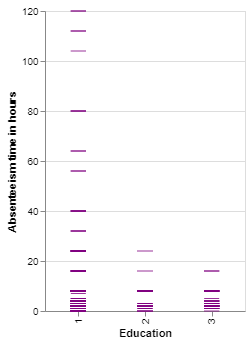

In [212]:
# boxplots for ordinal feature vs. target
alt.Chart(train_df).mark_tick(color='purple', opacity=0.8).encode(
    alt.X(alt.repeat("repeat"), type='nominal'),
    alt.Y('Absenteeism time in hours')
).properties(width=200, height=300
).repeat(repeat=ordinal_col)

> Add comments (Santiago)

# Insights & Conclusions (Santiago) 
